<a href="https://colab.research.google.com/github/behrangEhi/complex-network/blob/main/link_prediction_algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import libraries

In [ ]:
import networkx as nx
from collections import deque, defaultdict
import numpy as np
import matplotlib.pyplot as plt

## Implement graph visualization

In [ ]:
def visualize_graph(G):
  pos = nx.spring_layout(G)
  plt.figure(figsize=(8, 6))
  nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=800, edge_color='gray', linewidths=1, font_size=10)
  plt.title('Graph Visualization')
  plt.show()

## Demonstrates the implementation of the common neighbors matrix Γ for a given graph G.

The matrix Γ, whose row u and column v are related to the number of common neighbors between vertices u and v, is calculated using the expression Γ(v,u). To calculate the common neighbors of two vertices, each neighboring vertex must also be considered, as the values on the main diagonal of the adjacency matrix are 1.

For example, for a graph of two vertices (K2), the number of common neighbors of the two vertices is 2, as there is a cycle. More generally, for two vertices in the Kn graph, the number of common neighbors will be equal to n.

In [ ]:
def common_neighbors_matrix(G):
    """
    Calculates the matrix Γ, where the element at row u and column v represents the number of common neighbors between vertices u and v.

    Args:
        G (nx.Graph): The input graph.

    Returns:
        np.ndarray: The common neighbors matrix Γ.
    """
    n = G.number_of_nodes()
    Gamma = np.zeros((n, n))

    # Iterate over all pairs of vertices
    for u in G.nodes():
        for v in G.nodes():
            # Get the set of neighbors for u and v
            neighbors_u = set(G.neighbors(u))
            neighbors_v = set(G.neighbors(v))

            # Calculate the number of common neighbors
            common_neighbors = len(neighbors_u & neighbors_v)

            # Add the number of common neighbors to the Γ matrix
            Gamma[u, v] = common_neighbors

    # Set the diagonal elements to the number of neighbors for each vertex
    for u in G.nodes():
        Gamma[u, u] = len(list(G.neighbors(u)))

    return Gamma


Gamma: 
 [[3. 1. 2. 1.]
 [1. 2. 1. 2.]
 [2. 1. 3. 1.]
 [1. 2. 1. 2.]]


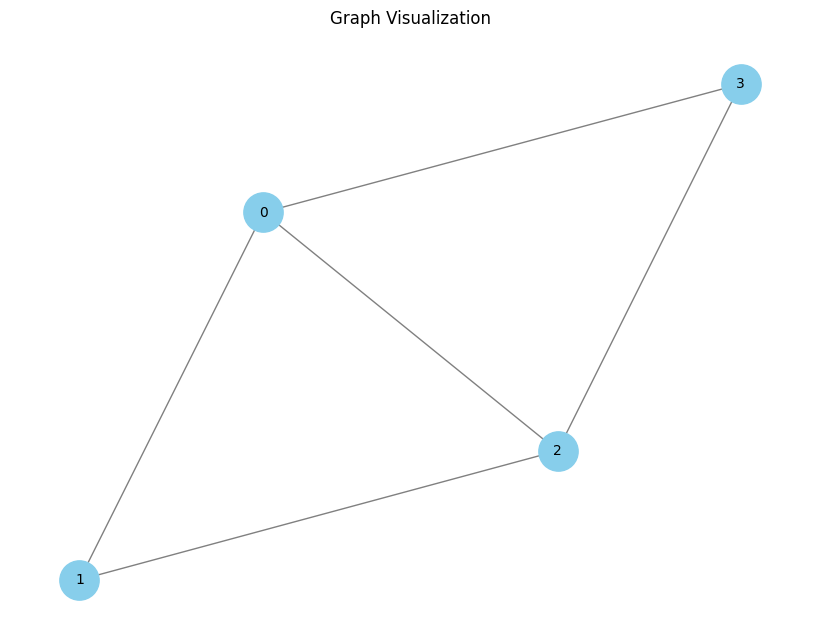

In [ ]:
# Create a sample graph
G = nx.Graph()
G.add_edges_from([(0, 1), (1, 2), (2, 3), (3, 0), (0, 2)])

# Calculate the common neighbors matrix
Gamma = common_neighbors_matrix(G)
print(f"Gamma: \n {Gamma}")
visualize_graph(G)

## Paths Matrix (P) Calculation using Breadth-First Search Algorithm

This section implements a function to calculate the paths matrix for undirected graphs using the Breadth-First Search (BFS) algorithm with a time complexity of O(V^2 + E). The function is tested on a sample graph, and the paths matrix is printed for better understanding.

In [ ]:
# This implementation has a time complexity of O(V^2 + E), where V is the number of vertices and E is the number of edges in the graph, as we perform a BFS starting from each vertex.
def paths_matrix(G):
    """
    Calculates the matrix P, where the element at row u and column v represents the number of distinct paths between vertices u and v.

    Args:
        G (nx.Graph): The input graph.

    Returns:
        np.ndarray: The paths matrix P.
    """
    n = G.number_of_nodes()
    P = np.zeros((n, n), dtype=int)

    for u in G.nodes():
        # Perform BFS from vertex u
        queue = deque([(u, [u])])
        while queue:
            v, path = queue.popleft()
            P[u, v] += 1

            # Explore all neighbors of v
            for neighbor in G.neighbors(v):
                if neighbor not in path:
                    queue.append((neighbor, path + [neighbor]))

    return P

In [ ]:
# Create a sample graph
G2 = nx.Graph()
G2.add_edges_from([(0, 1), (1, 2), (2, 3), (3, 0), (0, 2)])

P = paths_matrix(G2)
print(f"P : \n {P}")

P : 
 [[1 3 3 3]
 [3 1 3 4]
 [3 3 1 3]
 [3 4 3 1]]


## Computing Minimum Cut Matrix using Stoer-Wagner Algorithm

This section implements the Stoer-Wagner algorithm to compute the minimum cut matrix for an undirected graph. The algorithm utilizes NetworkX's **minimum_node_cut** function to calculate the minimum cut set for each pair of vertices. We test our implementation on a sample graph and visualize it using the **visualize_graph** function.

min_cut : 
 [[0. 0. 0. 1. 1.]
 [0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0.]
 [1. 1. 0. 0. 0.]]


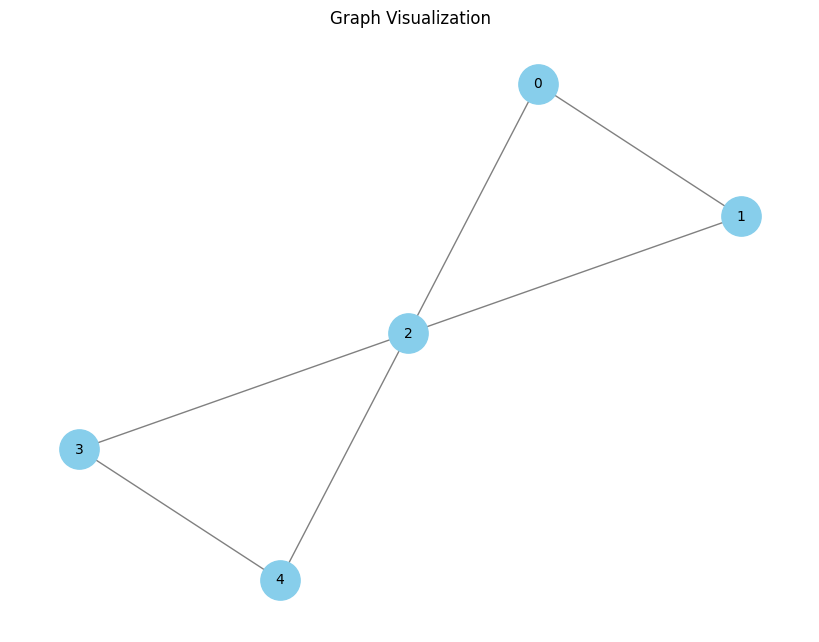

In [ ]:
def stoer_wagner_min_cut(G):
    # Initialize the minimum cut matrix
    adjacency_matrix = nx.to_numpy_array(G, nodelist=G.nodes())
    min_cut_matrix = np.zeros((G.number_of_nodes(), G.number_of_nodes()))

    # Iterate through the graph's vertices to calculate the minimum cut matrix
    for u in range(G.number_of_nodes()):
        for v in range(u + 1, G.number_of_nodes()):
            # Compute the minimum cut set for vertices u and v
            min_cut_set = nx.minimum_node_cut(G, u, v)

            # Populate the minimum cut matrix with the size of the cut set
            min_cut_matrix[u, v] = len(min_cut_set)
            min_cut_matrix[v, u] = len(min_cut_set)  # Symmetric matrix

    return min_cut_matrix

# Create a sample graph
G3 = nx.Graph()
G3.add_edges_from([(0, 1), (1, 2), (2, 3), (0, 2), (4, 2), (4, 3)])

min_cut = stoer_wagner_min_cut(G3)

# Print the minimum cut matrix
print(f"min_cut : \n {min_cut}")
visualize_graph(G3)

## Implement Minimum Path Length Matrix (SP) for Graph Vertices

SP : 
 [[0. 1. 1. 2. 2.]
 [1. 0. 1. 2. 2.]
 [1. 1. 0. 1. 1.]
 [2. 2. 1. 0. 1.]
 [2. 2. 1. 1. 0.]]


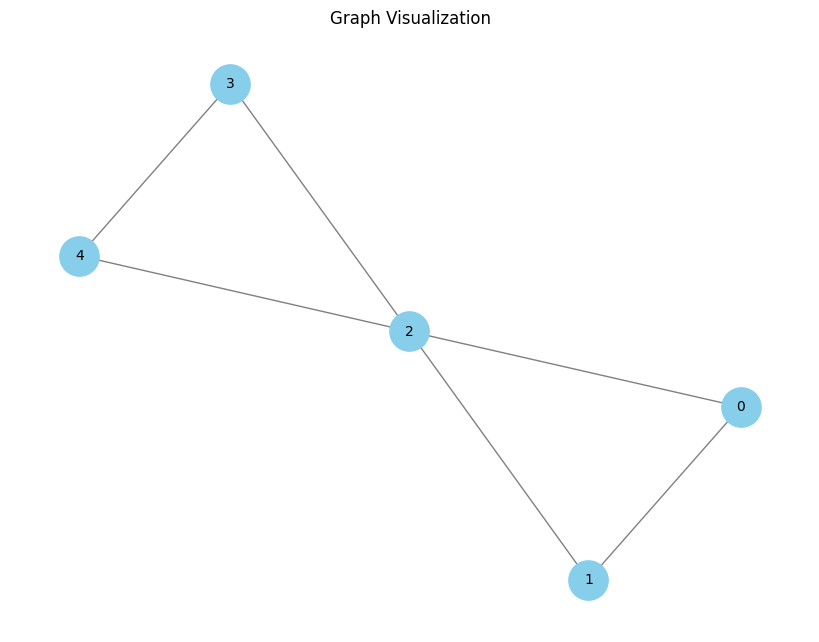

In [93]:
def min_path_length_matrix(G):
    """
    Calculates the matrix D, where the element at row u and column v represents the minimum length (number of edges) of a path between vertices u and v.

    Args:
        G (nx.Graph): The input graph.

    Returns:
        np.ndarray: The minimum path length matrix D.
    """
    n = G.number_of_nodes()
    D = np.zeros((n, n))

    for u in range(n):
        for v in range(n):
            # Use Dijkstra's shortest path algorithm to find the shortest path length
            shortest_path_length = nx.shortest_path_length(G, source=u, target=v)
            D[u, v] = shortest_path_length
            D[v, u] = shortest_path_length  # Symmetric matrix

    return D

# Create a sample graph
G4 = nx.Graph()
G4.add_edges_from([(0, 1), (1, 2), (2, 3), (0, 2), (4, 2), (4, 3)])

SP = min_path_length_matrix(G4)

# Print the minimum cut matrix
print(f"SP : \n {SP}")
visualize_graph(G4)

## Computing Degree Array for Graph Vertices

This section introduces a function to calculate the degree array for an undirected graph, where each element represents the degree of a vertex (i**ncluding itself**). The degree array provides a simple yet essential overview of vertex connectivity in the graph.

D: 
 [3 3 5 3 3]


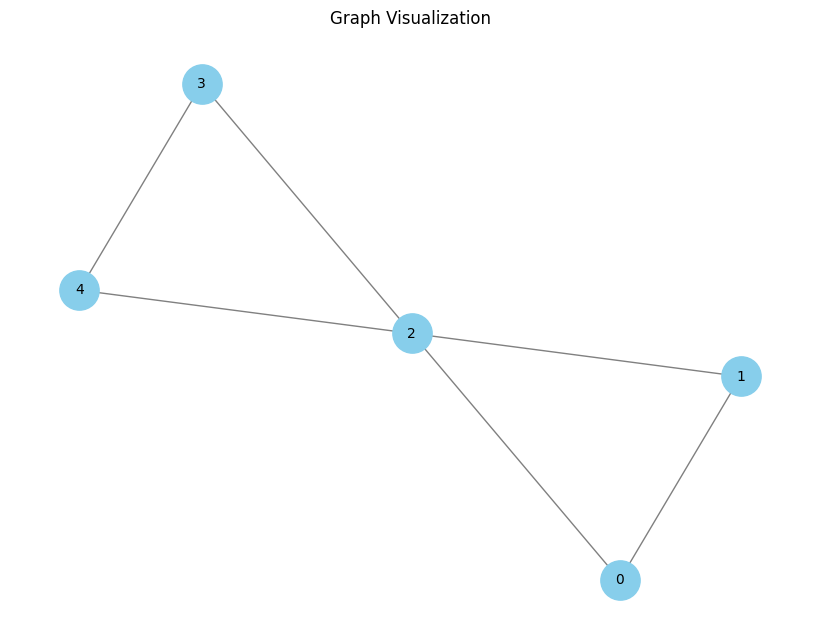

In [94]:
def degree_array(G):
    """
    Calculates the degree array, where each element represents the degree of a vertex (including itself).

    Args:
        G (nx.Graph): The input graph.

    Returns:
        np.ndarray: The degree array.
    """
    n = G.number_of_nodes()
    degree_array = np.array([G.degree(u) + 1 for u in range(n)])

    return degree_array

G5 = nx.Graph()
G5.add_edges_from([(0, 1), (1, 2), (2, 3), (0, 2), (4, 2), (4, 3)])

D = degree_array(G5)
print(f"D: \n {D}")

visualize_graph(G5)